# 找基底

這裡我們想從線性獨立的子集, 擴增為某個向量空間的基底。

(課本 3.4)

## 事件

有個向量空間 $V$ 的一個基底 $\beta$ 為

$$\beta = \{(-7,1,0,0,0), (-5,0,1,0,0), (4,0,0,1,0), (-2,0,0,0,1)\}$$

我們現在有個集合

$$S = \{(-2,0,0,-1,-1), (1,1,-2,-1,-1), (-5,1,0,1,1)\}$$

很容易驗證 $S$ 是 $V$ 線性獨立的子集合。現在我們想擴充 $S$ 成為 $V$ 的另一個基底。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [6]:
import sympy as sp

In [7]:
sp.init_printing()

## 解決篇

### 1. 設一個矩陣

要包括我們的 $S$, 並且確定可以生成 $V$ 的向量。

In [20]:
A = sp.Matrix([[-2,0,0,-1,-1], [1,1,-2,-1,-1],
              [-5,1,0,1,1], [-7,1,0,0,0], 
               [-5,0,1,0,0], [4,0,0,1,0], 
               [-2,0,0,0,1]])

### 2. 轉置

因為我們要變成行向量

In [21]:
B = A.T

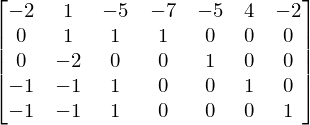

In [22]:
B

### 3. 做 RREF

求 $B$ 的 reduced row echelon form

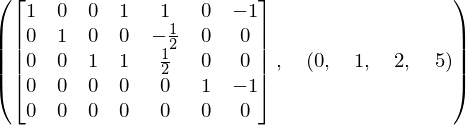

In [23]:
B.rref()

第一部份是 reduced row echelon form, 第二部份是 pivot columns 是那幾行。

### 4. 找出我們要的向量

我們已經知道要的就是 pivot columns 相對應的那幾行。

In [32]:
r = B.rref()[1]

In [33]:
r

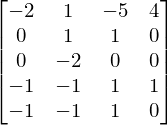

In [39]:
B.col(r)

當然相對來說就是原來轉置前 A 的那幾列!

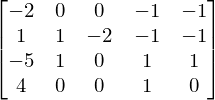

In [40]:
A.row(r)

## 複習: 多項式

### 1. 令 Sympy 的變數

#### (1) 標準方式

In [41]:
x, y = sp.symbols('x,y')

In [44]:
x**2 - 3*x*y**2

#### (2) 神秘 abc 套件

In [45]:
from sympy.abc import x, y

還有很炫的...

In [50]:
from sympy.abc import alpha

In [51]:
alpha*3

### 2. 多項式

真的也沒什麼, 和我們想的一樣。

In [52]:
f = 3*x**2 - 2*x + 8

In [53]:
f

In [54]:
sp.diff(f,x)

In [58]:
sp.integrate(f,x)

#### 變成「真的」多項式

就如同陣列「不知道」自己是矩陣, $f$ 也沒意識到它是多項式。所以有些多項式的功能是沒有的。

In [56]:
g = sp.poly(f)

In [57]:
g.coeffs()

### 3. 挑戰

我們當然不是沒頭沒腦複習多項式, 而是希望你也可以在多項式形式的向量空間找基底。比如說, 擴充

$$S = \{1+x+x^2+x^3, 1-3x^2\}$$

成一個 $P_3(\mathbb{R})$ 的基底。